Enunciado: Escribe una función llamada scrape_coches_ocasion que acepta una URL como argumento y devuelve un DataFrame de pandas con información sobre coches de ocasión encontrados en la página web especificada. La función realizará las siguientes tareas:

Realizará una solicitud HTTP GET a la siguiente url.

Comprobará el código de estado de la respuesta. Si el código no es 200 (OK), imprimirá un mensaje de error y retornará None.

Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.

Organizará los datos extraídos en un DataFrame de pandas con las siguientes columnas:

"coche": Nombres de los coches.

"precio_rebajado": Precios rebajados.

"precio_original": Precios originales.

"km": Kilómetros recorridos.

Retornará el DataFrame resultante.

Una vez extraida toda la información deberéis almacenar toda la información en un DataFrame. El DataFrame debe tener un aspecto parecido a este:

In [48]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

In [49]:
res_coches_ocasion = requests.get("https://www.ocasionplus.com/coches-ocasion/v2?orderBy=morePopular")

print(f"La respuesta a tu peticion es {res_coches_ocasion.status_code}")

La respuesta a tu peticion es 200


La respuesta a tu peticion es 200
b'<!DOCTYPE html><html lang="es"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width, initial-scale=1"/><link rel="preload" href="/hera/_next/static/media/351a934e96d2300f-s.p.woff2" as="font" crossorigin="" type="font/woff2"/><link rel="preload" href="/hera/_next/static/media/e1c529c04de64b40-s.p.woff2" as="font" crossorigin="" type="font/woff2"/><link rel="preload" as="image" href="https://www.ocasionplus.com/assets/images/logo-ocasionplus-o40.png"/><link rel="preload" as="image" href="/hera/icons/footer/facebook.png"/><link rel="preload" as="image" href="/hera/icons/footer/twitter.png"/><link rel="preload" as="image" href="/hera/icons/footer/youtube.png"/><link rel="preload" as="image" href="/hera/icons/footer/linkedin.png"/><link rel="preload" as="image" href="/hera/icons/home.svg"/><link rel="preload" as="image" href="/hera/icons/filters/car.svg"/><link rel="preload" as="image" href="/hera/icons/filters/motorbike.svg"/><
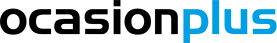

In [93]:
if res_coches_ocasion.status_code != 200:
        print("error")

else:
        print(f"La respuesta a tu peticion es {res_coches_ocasion.status_code}")
        print(res_coches_ocasion.content)

<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link as="font" crossorigin="" href="/hera/_next/static/media/351a934e96d2300f-s.p.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="" href="/hera/_next/static/media/e1c529c04de64b40-s.p.woff2" rel="preload" type="font/woff2"/><link as="image" href="https://www.ocasionplus.com/assets/images/logo-ocasionplus-o40.png" rel="preload"/><link as="image" href="/hera/icons/footer/facebook.png" rel="preload"/><link as="image" href="/hera/icons/footer/twitter.png" rel="preload"/><link as="image" href="/hera/icons/footer/youtube.png" rel="preload"/><link as="image" href="/hera/icons/footer/linkedin.png" rel="preload"/><link as="image" href="/hera/icons/home.svg" rel="preload"/><link as="image" href="/hera/icons/filters/car.svg" rel="preload"/><link as="image" href="/hera/icons/filters/motorbike.svg" rel="preload"/><link as="image" href="/hera/icons/f
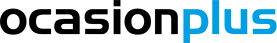

In [51]:
sopa_coches_ocasion = BeautifulSoup(res_coches_ocasion.content, "html.parser")

sopa_coches_ocasion

In [100]:
def scrape_coches_ocasion(url):

    res_coches_ocasion = requests.get("https://www.ocasionplus.com/coches-ocasion/v2?orderBy=morePopular")
                                      
    if res_coches_ocasion.status_code != 200:
        print ("error")

    else:
        print(f"La respuesta a tu peticion es {res_coches_ocasion.status_code}")

    sopa_coches_ocasion = BeautifulSoup(res_coches_ocasion.content, "html.parser")

    # Extraer nombre y apendear nombres en lista:

    lista_nombre_coches = sopa_coches_ocasion.find_all("h2", {"class": "cardVehicle_column_text__EvQkB"})

    nombre_coches = []

    for nombre in lista_nombre_coches:

        nombre_coches.append(nombre.text())

    # Extraer precio rebajado y convertir a float

    lista_precio_rebajado_coches = sopa_coches_ocasion.find_all("p", {"class":"topLayer_discount__8zFJc topLayer_statusCard__OZYOh topLayer_price__l_n9s"})

    lista_precio_rebajado = []

    for precio in lista_precio_rebajado_coches:

       lista_precio_rebajado.append(precio.text)

    lista_precio_rebajado_sineuros = [float(precio.replace("€", ""))for precio in lista_precio_rebajado]

    # Extraer precio original y convertir a float

    lista_precio_original_coches = sopa_coches_ocasion.find_all()

    lista_precio_original_coches = sopa_coches_ocasion.find_all("span", {"cardVehicle_finance__SG6JV"})

    
    
    # Extraer km y convertir a float

    lista_km = sopa_coches_ocasion.find_all()

    return nombre_coches

    print(nombre_coches)



In [101]:
lista_nombre_coches = sopa_coches_ocasion.find_all("h2", {"class": "cardVehicle_column_text__EvQkB"})

nombre_coches = []

for nombre in lista_nombre_coches:

    nombre_coches.append(nombre.text())

TypeError: 'str' object is not callable

In [71]:
lista_precio_rebajado_coches = sopa_coches_ocasion.find_all("p", {"class":"topLayer_discount__8zFJc topLayer_statusCard__OZYOh topLayer_price__l_n9s"})

lista_precio_rebajado = []

for precio in lista_precio_rebajado_coches:

       lista_precio_rebajado.append(precio.text)

print(lista_precio_rebajado)

['-2.978€', '-1.881€', '-2.000€', '-2.950€', '-1.718€', '-1.227€', '-1.678€', '-2.355€', '-1.950€', '-1.950€', '-3.591€', '-1.236€', '-2.290€', '-3.090€', '-1.545€', '-1.672€', '-2.363€']


In [72]:
lista_precio_original_coches = sopa_coches_ocasion.find_all("span", {"cardVehicle_finance__SG6JV"})



In [89]:

lista_precio_rebajado_sineuros = [float(precio.replace("€", ""))for precio in lista_precio_rebajado]

print(lista_precio_rebajado_sineuros)


[-2.978, -1.881, -2.0, -2.95, -1.718, -1.227, -1.678, -2.355, -1.95, -1.95, -3.591, -1.236, -2.29, -3.09, -1.545, -1.672, -2.363]


In [65]:
print(lista_precio_rebajado[0])

lista_precio_rebajado[0].split()

-2.978€


['-2.978€']

In [39]:
scrape_coches_ocasion("https://www.ocasionplus.com/coches-ocasion/v2?orderBy=morePopular")

La respuesta a tu peticion es 200


['Skoda Fabia1.2 Urban (69 CV)',
 'Audi A3Sportback TFSIe 40 TFSIe S tronic (204 CV) Pack S-Line',
 'Audi A3Sportback 30 TDI S line S-tronic (116 CV) S LINE',
 'Seat León1.4 TSI  ACT DSG-7 St&Sp FR Plus',
 'Mercedes Clase AMercedes-Benz A 200 d Pack AMG (150 CV)',
 'Volkswagen GolfSport 2.0 TDI CR BMT (150 CV) DSG',
 'Opel Astra2.0 CDTi S&S Selective (165 CV)',
 'KIA Stonic1.2 CVVT Eco-Dynamics Drive (84 CV)',
 'Volkswagen Golf1.5 TSI Evo (130 CV)',
 'Hyundai i301.6 CRDI GLS Style (128 CV)',
 'Ford Focus1.5 Ecoblue ST-Line X  (120 CV)',
 'Peugeot 3008SUV SUV PureTech 130 Allure EAT8 (130 CV)',
 'Peugeot 3008SUV 1.5 BlueHDi  (130CV) S&S Allure',
 'Lexus RX450h Luxury  (313 CV)',
 'Citroën C3PureTech 110 S&S Feel EAT6 (110 CV)',
 'Seat León2.0 TFSI S&S Cupra DSG-7 (290 CV)',
 'Hyundai i302.0 TGDI N Performance (280CV)',
 'Renault Kangoo CombidCi 90 Extrem Energy (90 CV)',
 'Seat Ibiza1.0 TSI FR Plus DSG (115 CV)',
 'Toyota CorollaTouring Sports 180H Style E-CVT (122 CV)']